In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 14

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.shape

(20640, 10)

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].head(4)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
Name: ocean_proximity, dtype: object

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### plot out histograms across all attributes in dataset

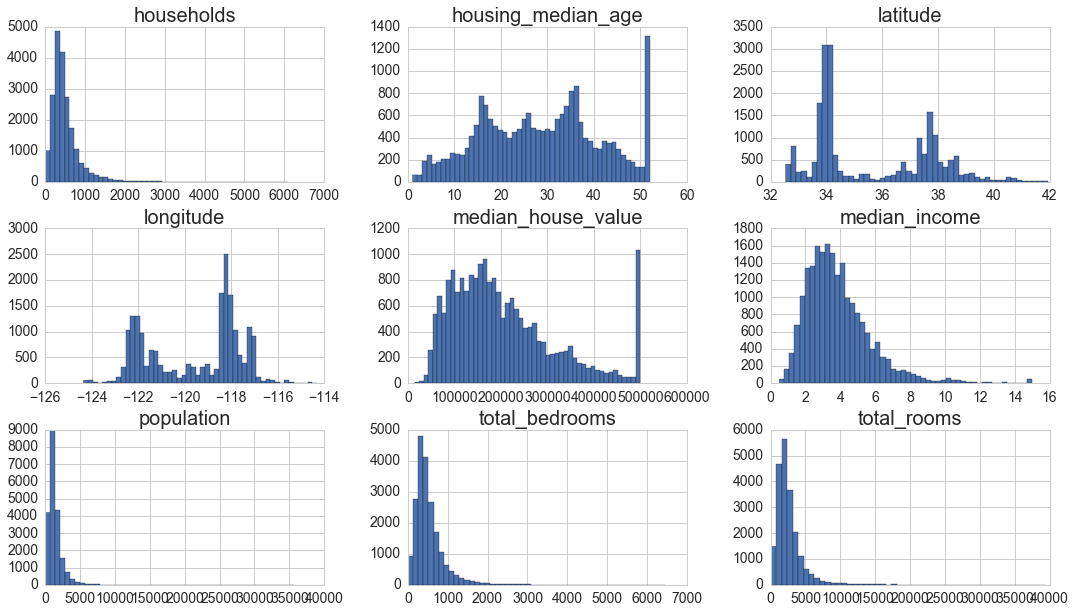

In [17]:
housing.hist(bins=50,figsize=(18,10));

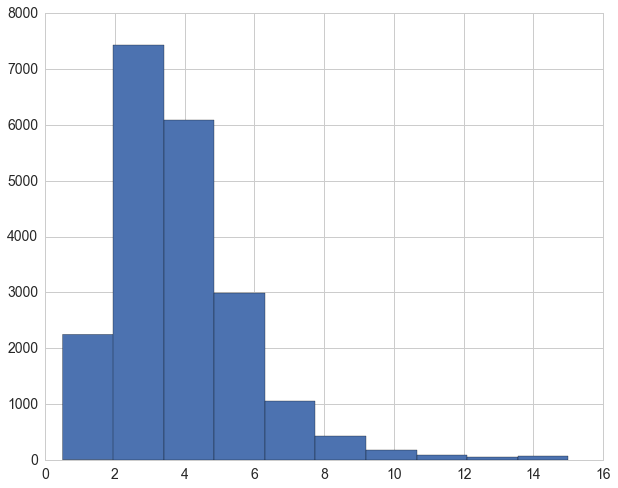

In [25]:
housing['median_income'].hist(bins = 10, figsize=(10,8));

### turn the median_income from numerical into categoric variable

In [34]:
median_income_categoric = housing['median_income'] / 1.5
median_income_categoric[:5]

0    5.550133
1    5.534267
2    4.838267
3    3.762067
4    2.564133
Name: median_income, dtype: float64

In [35]:
median_income_categoric = np.ceil(median_income_categoric)
median_income_categoric[:5]

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: median_income, dtype: float64

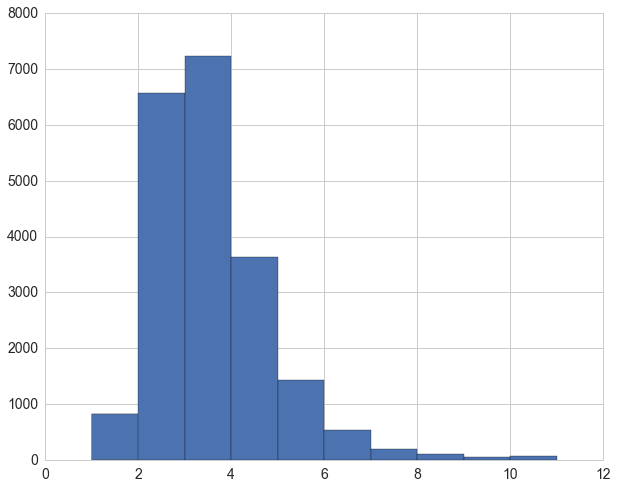

In [37]:
housing['median_income_categoric'] = median_income_categoric
housing['median_income_categoric'].hist(bins = 10, figsize=(10,8))

In [38]:
housing['median_income_categoric'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: median_income_categoric, dtype: int64

we only want the median_income_categoric variable becomes [1, 2, 3, 4, 5], so we categorize 5+ into group 5

In [39]:
median_income_categoric = np.where(median_income_categoric > 5, 5, median_income_categoric)

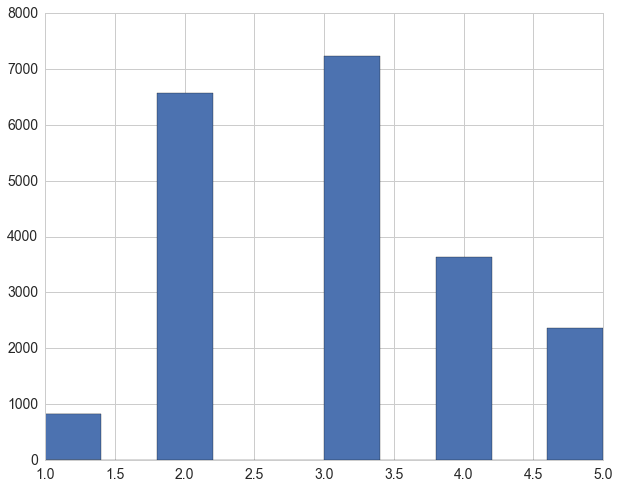

In [47]:
housing['median_income_categoric'] = median_income_categoric
housing['median_income_categoric'].hist(bins=10, figsize=(10, 8));

## StratifiedShuffleSplit VS randomly train_test_split

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
random_seed = 42

In [58]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = random_seed)

In [50]:
strat_shuffle_split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state = random_seed)

In [51]:
for train_idx, test_idx in strat_shuffle_split.split(housing, housing['median_income_categoric']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set  = housing.loc[test_idx]

In [53]:
housing['median_income_categoric'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: median_income_categoric, dtype: float64

In [54]:
strat_train_set['median_income_categoric'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: median_income_categoric, dtype: float64

In [59]:
train_set['median_income_categoric'].value_counts() / len(train_set)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: median_income_categoric, dtype: float64

In [60]:
strat_test_set['median_income_categoric'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: median_income_categoric, dtype: float64

In [61]:
test_set['median_income_categoric'].value_counts() / len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: median_income_categoric, dtype: float64

In [65]:
def income_categoric_proportion(data):
    return data['median_income_categoric'].value_counts() / len(data)

create a DataFrame to illustrate how stratified_shuffle and random_split split dataset

In [66]:
compare_prop = pd.DataFrame(data = {'original': income_categoric_proportion(housing),
                                    'stratified': income_categoric_proportion(strat_train_set),
                                    'random': income_categoric_proportion(train_set)})

In [67]:
compare_prop

,original,random,stratified
3.0,0.350581,0.348595,0.350594
2.0,0.318847,0.317466,0.318859
4.0,0.176308,0.178537,0.176296
5.0,0.114438,0.115673,0.114402
1.0,0.039826,0.039729,0.039850


In [69]:
compare_prop = compare_prop.sort_index()
compare_prop

,original,random,stratified
1.0,0.039826,0.039729,0.039850
2.0,0.318847,0.317466,0.318859
3.0,0.350581,0.348595,0.350594
4.0,0.176308,0.178537,0.176296
5.0,0.114438,0.115673,0.114402


In [70]:
compare_prop['strat % error'] = 100 * income_categoric_proportion(strat_train_set) \
                                    / income_categoric_proportion(housing) - 100

In [71]:
compare_prop['random % error'] = 100 * income_categoric_proportion(train_set) \
                                    / income_categoric_proportion(housing) - 100

In [72]:
compare_prop

,original,random,stratified,strat % error,random % error
1.0,0.039826,0.039729,0.039850,0.060827,-0.243309
2.0,0.318847,0.317466,0.318859,0.003799,-0.433065
3.0,0.350581,0.348595,0.350594,0.003455,-0.566611
4.0,0.176308,0.178537,0.176296,-0.006870,1.264084
5.0,0.114438,0.115673,0.114402,-0.031753,1.079594


from the table we can see that if we split the data in a stratified shuffle way, train and test sets are perfectly capture the distribution of original data. However, the random split strategy might have over or under sampling issue.

because we just want the median_income_categoric for justifying the effect of using random split and stratified shuffle split, so we can now drop it off

In [73]:
for var_ in (strat_train_set, strat_test_set):
    var_.drop('median_income_categoric', axis = 1, inplace = True)

# Discover and visualize the data

In [74]:
housing = strat_train_set.copy()

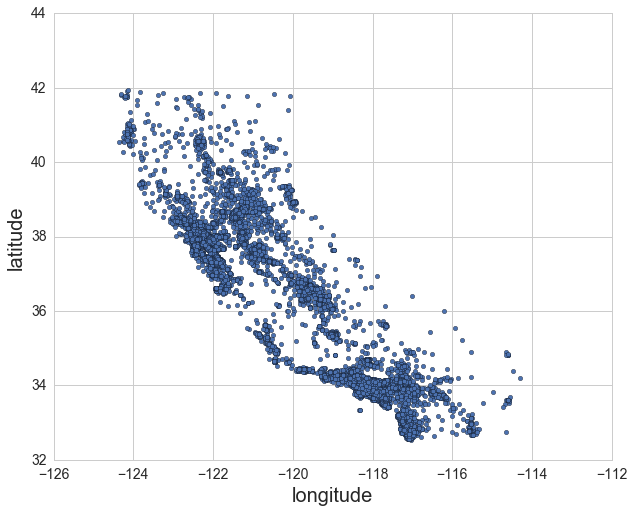

In [79]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', figsize=(10,8));

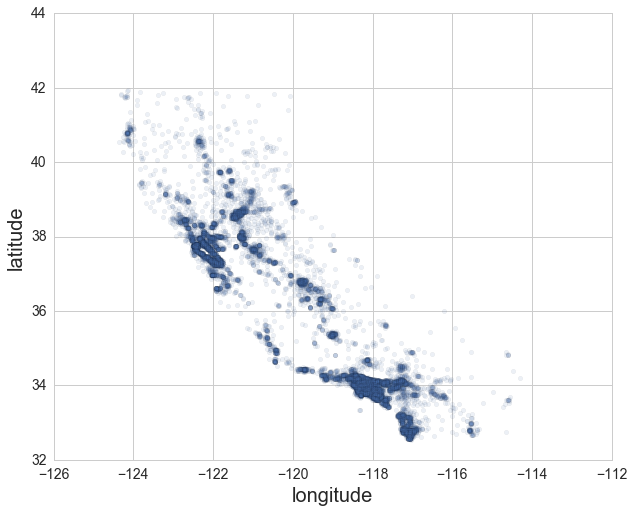

In [82]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.1, figsize=(10, 8));

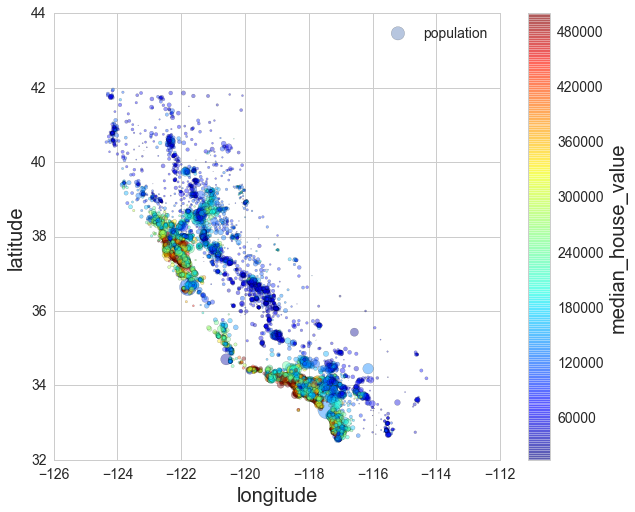

In [83]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, figsize=(10,8),\
             s = housing['population']/100, label = 'population', c = 'median_house_value', cmap = plt.get_cmap('jet'),\
             colorbar = True, sharex = False);

#### correlation of housing data matrix

In [84]:
corr_matrix = housing.corr()

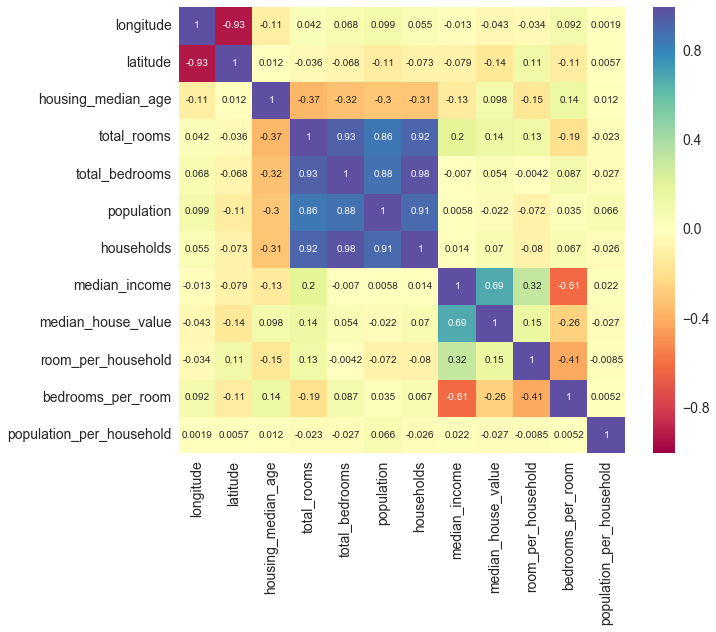

In [224]:
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('Spectral')
sns.heatmap(corr_matrix, annot=True, square = True, cmap=cmap);

In [94]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687014
total_rooms           0.139801
housing_median_age    0.098433
households            0.069613
total_bedrooms        0.054374
population           -0.021903
longitude            -0.043442
latitude             -0.144854
Name: median_house_value, dtype: float64

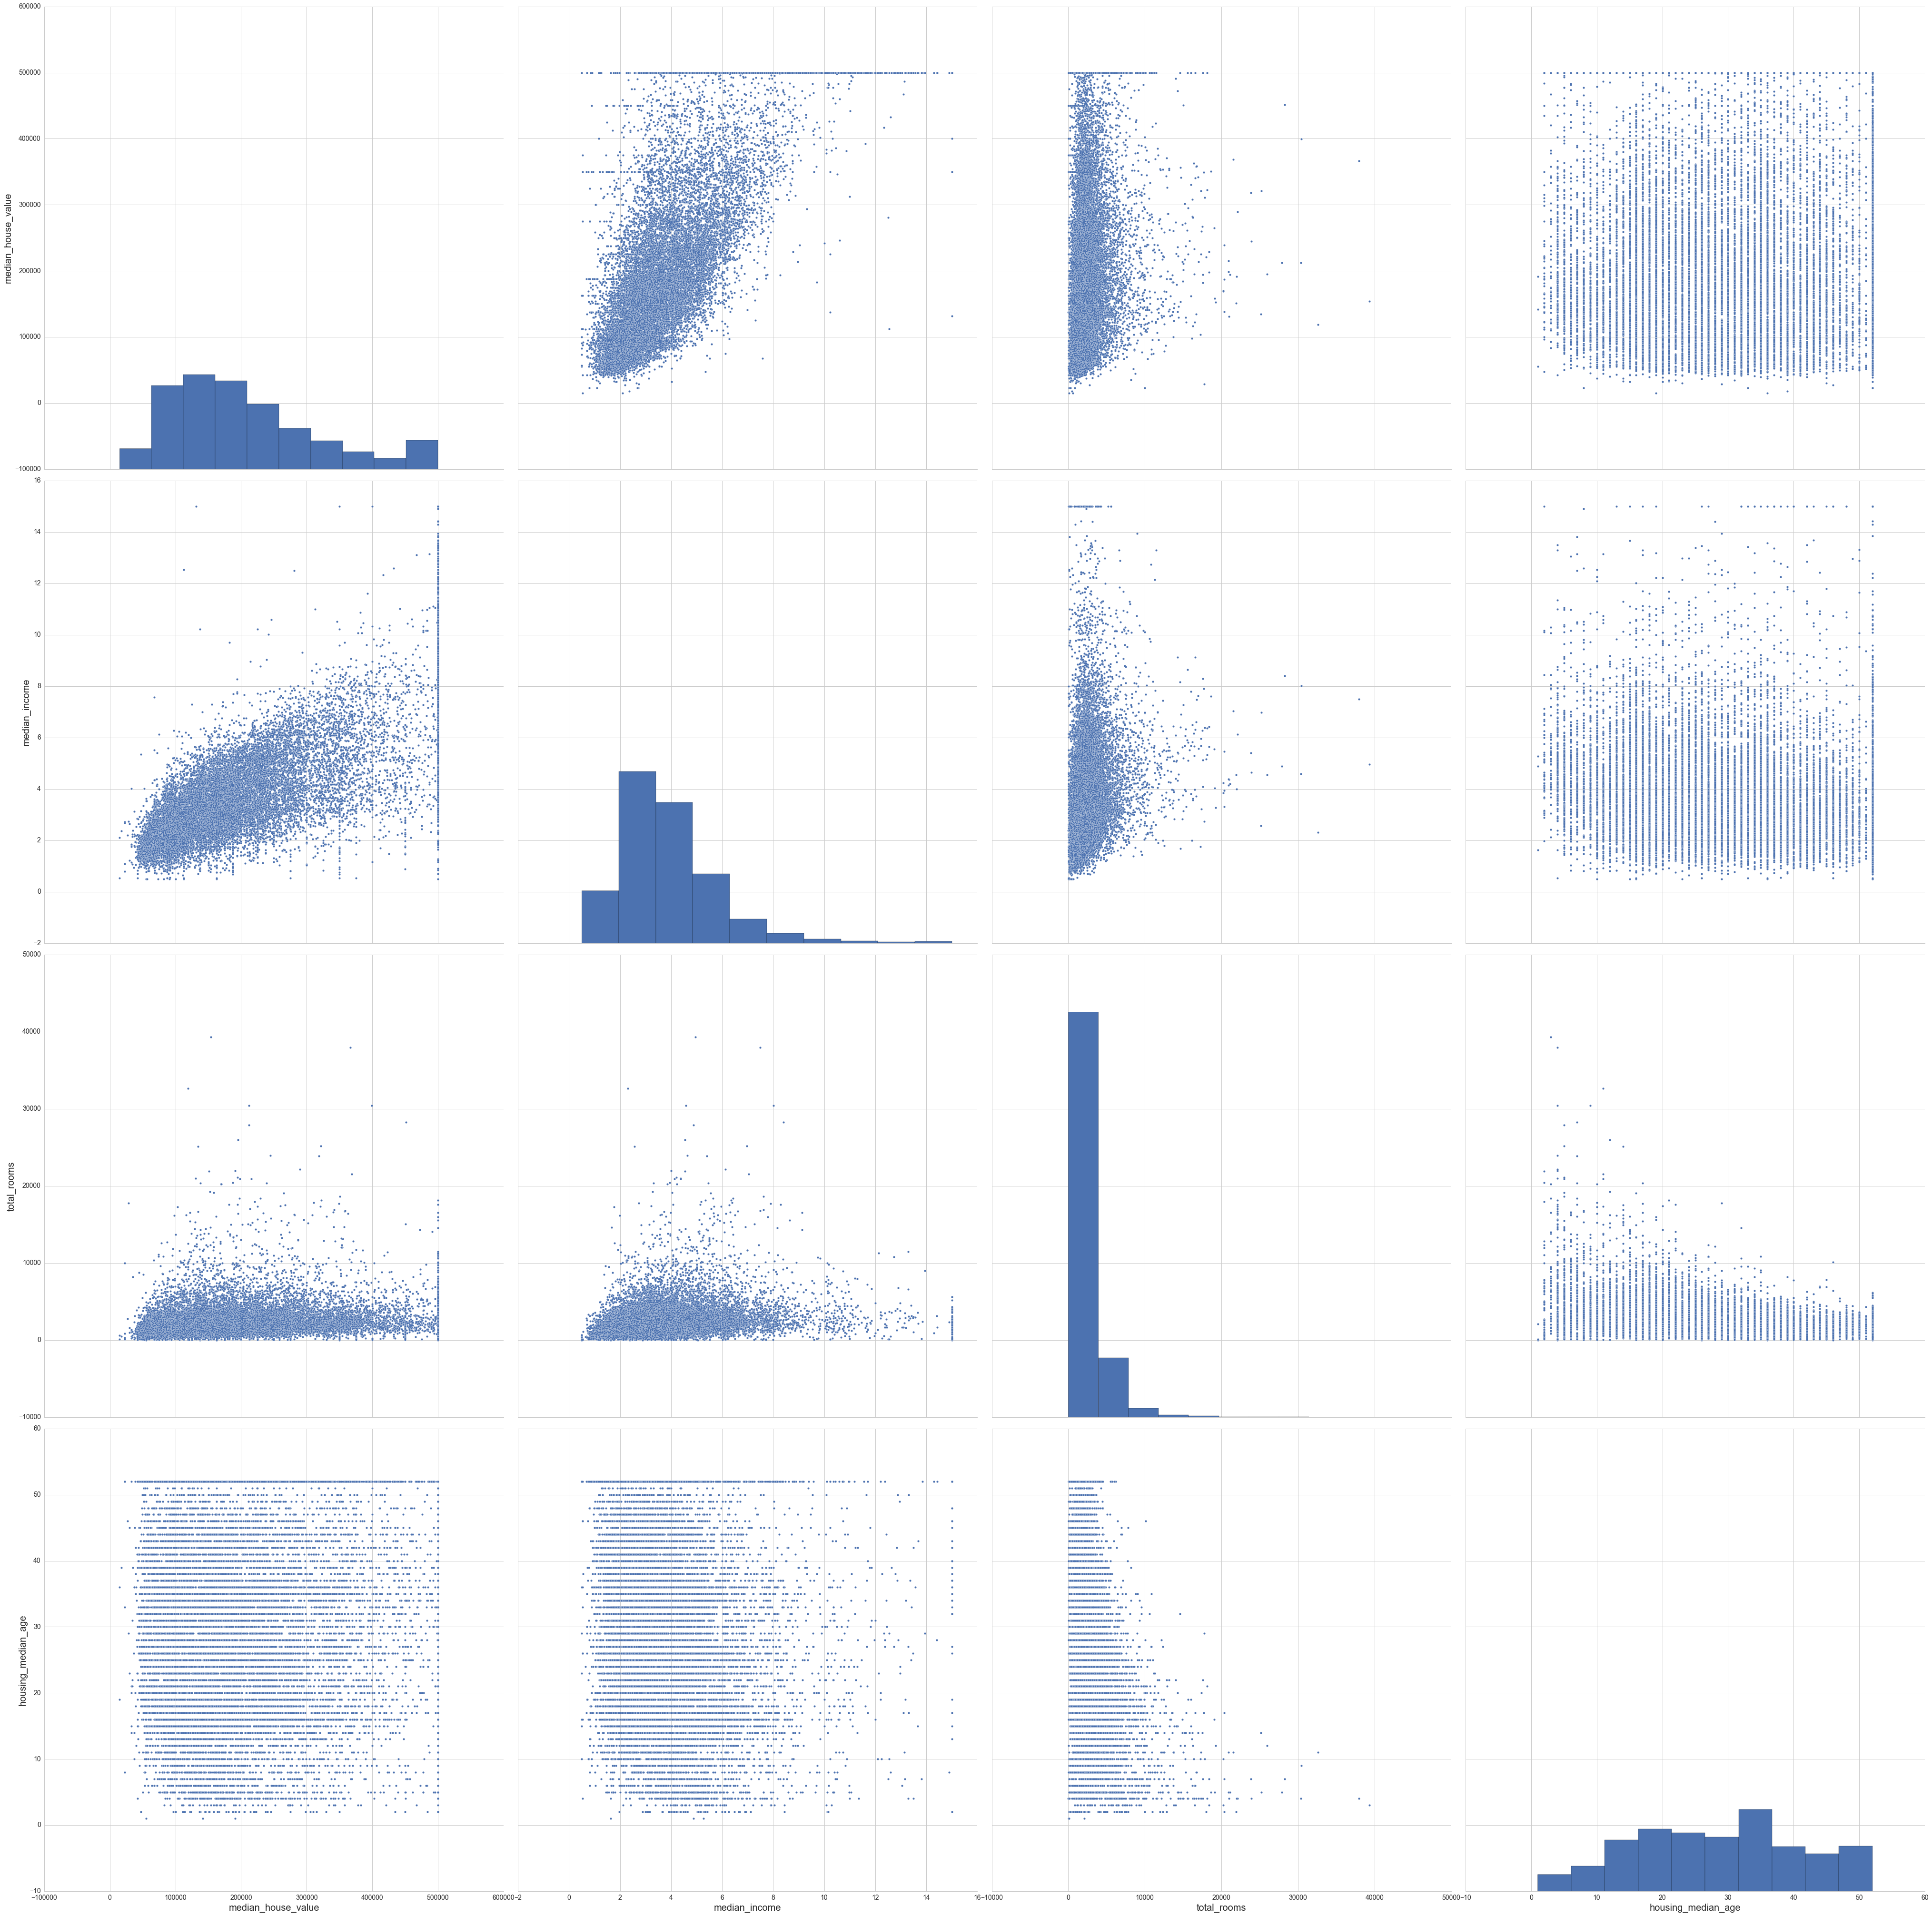

In [107]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[attributes],size=14);

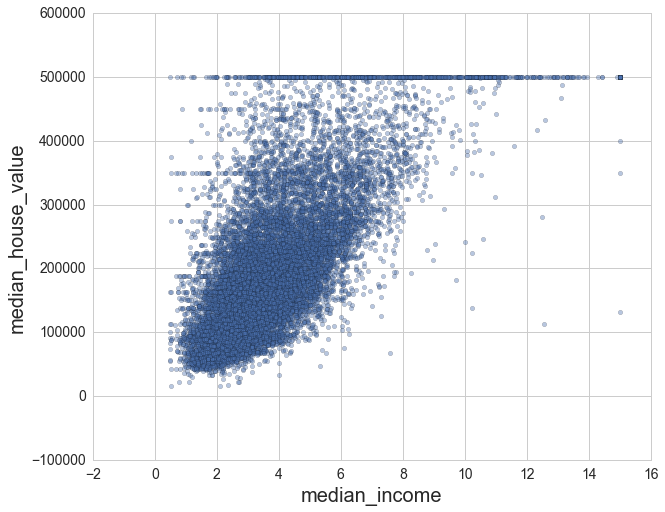

In [110]:
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.4, figsize=(10, 8));

In [111]:
housing['room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [113]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687014
room_per_household          0.154133
total_rooms                 0.139801
housing_median_age          0.098433
households                  0.069613
total_bedrooms              0.054374
population                 -0.021903
population_per_household   -0.027443
longitude                  -0.043442
latitude                   -0.144854
bedrooms_per_room          -0.256332
Name: median_house_value, dtype: float64

In [114]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16348.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16348.000000,16512.000000
mean,-119.570288,35.631535,28.654554,2638.313045,538.551811,1426.405402,500.445736,3.873689,206684.760962,5.429325,0.213037,3.065793
std,2.004320,2.136484,12.576076,2182.140047,423.186826,1144.557236,385.665549,1.913941,115345.170283,2.541600,0.058001,10.919605
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1442.000000,295.000000,784.000000,278.000000,2.562500,119800.000000,4.440869,0.175348,2.428571
50%,-118.490000,34.260000,29.000000,2123.500000,434.000000,1166.000000,409.000000,3.534100,179700.000000,5.234201,0.203038,2.821392
75%,-118.010000,37.720000,37.000000,3154.250000,647.000000,1724.000000,606.000000,4.746450,264300.000000,6.048632,0.240104,3.277262
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Data preprocessing

In [115]:
# drop labels for training set
housing = strat_train_set.drop('median_house_value', axis = 1)

In [116]:
# assign labels to response variable
housing_labels = strat_train_set['median_house_value'].copy()

In [139]:
housing[housing.isnull().any(axis = 1)].head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19890,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281,INLAND
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,<1H OCEAN
15479,-117.14,33.16,16.0,1660.0,NaN,733.0,214.0,5.6874,<1H OCEAN
10495,-117.66,33.51,18.0,2626.0,NaN,1302.0,522.0,4.0167,<1H OCEAN


In [168]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)]
sample_incomplete_rows.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19890,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281,INLAND
15607,-116.66,32.79,13.0,843.0,NaN,918.0,152.0,6.2152,<1H OCEAN
15479,-117.14,33.16,16.0,1660.0,NaN,733.0,214.0,5.6874,<1H OCEAN


## MISSING data

we now have MISSING data on attribute 'total_bedrooms', and it is necessary to figure out ways to tackle the attribute with missing data

### Solution 1: drop all instances while their 'total_bedrooms' are null.

In [169]:
sol_1 = sample_incomplete_rows.dropna(subset=['total_bedrooms'])
sol_1.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


The empty table means that 'total_bedrooms' for all instances are null values, so we end up the second solution.

### Solution 2: drop the 'total_bedrooms' column for all instances.

In [170]:
sol_2 = sample_incomplete_rows.drop('total_bedrooms', axis = 1)
sol_2.head(4)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
19890,-119.15,36.29,18.0,1435.0,657.0,254.0,2.4281,INLAND
15607,-116.66,32.79,13.0,843.0,918.0,152.0,6.2152,<1H OCEAN
15479,-117.14,33.16,16.0,1660.0,733.0,214.0,5.6874,<1H OCEAN
10495,-117.66,33.51,18.0,2626.0,1302.0,522.0,4.0167,<1H OCEAN


### Solution 3: fill the null value with an alternative value.

In [171]:
total_bedrooms_median = housing['total_bedrooms'].median()

In [172]:
sol_3 = sample_incomplete_rows.fillna(total_bedrooms_median)
sol_3.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19890,-119.15,36.29,18.0,1435.0,434.0,657.0,254.0,2.4281,INLAND
15607,-116.66,32.79,13.0,843.0,434.0,918.0,152.0,6.2152,<1H OCEAN
15479,-117.14,33.16,16.0,1660.0,434.0,733.0,214.0,5.6874,<1H OCEAN
10495,-117.66,33.51,18.0,2626.0,434.0,1302.0,522.0,4.0167,<1H OCEAN


In [175]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
sample_incomplete_rows['total_bedrooms'].fillna(total_bedrooms_median, inplace = True)
sample_incomplete_rows.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19890,-119.15,36.29,18.0,1435.0,434.0,657.0,254.0,2.4281,INLAND
15607,-116.66,32.79,13.0,843.0,434.0,918.0,152.0,6.2152,<1H OCEAN
15479,-117.14,33.16,16.0,1660.0,434.0,733.0,214.0,5.6874,<1H OCEAN
10495,-117.66,33.51,18.0,2626.0,434.0,1302.0,522.0,4.0167,<1H OCEAN


### Solution 4: fill null value using sklearn.preprocessing.impute

In [177]:
from sklearn.preprocessing import Imputer

In [178]:
# we first need to specify the strategy for Imputer
imputer = Imputer(strategy='median')

Remove the text attribute since median can only be calculated on numerical attributes

In [179]:
housing_numerical = housing.drop('ocean_proximity', axis = 1)

fit imputer with numerical attributes

In [180]:
imputer.fit(housing_numerical)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [181]:
imputer.statistics_

array([ -118.49  ,    34.26  ,    29.    ,  2123.5   ,   434.    ,
        1166.    ,   409.    ,     3.5341])

In [182]:
housing_numerical.median()

longitude             -118.4900
latitude                34.2600
housing_median_age      29.0000
total_rooms           2123.5000
total_bedrooms         434.0000
population            1166.0000
households             409.0000
median_income            3.5341
dtype: float64

Transform the training set:

In [183]:
imputer_housing_numeric = imputer.transform(housing_numerical)

In [187]:
housing_numeric_impute_median = pd.DataFrame(data = imputer_housing_numeric, \
                                             columns = housing_numerical.columns,\
                                             index = housing.index.values)
housing_numeric_impute_median.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5288,-118.47,34.05,27.0,4401.0,1033.0,1725.0,962.0,4.1750
12865,-121.34,38.69,17.0,1968.0,364.0,996.0,331.0,3.7031
9174,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625
17247,-119.70,34.43,52.0,1364.0,460.0,804.0,400.0,2.3750


In [188]:
housing_numeric_impute_median = pd.DataFrame(data = imputer_housing_numeric, \
                                             columns = housing_numerical.columns)
housing_numeric_impute_median.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.47,34.05,27.0,4401.0,1033.0,1725.0,962.0,4.1750
1,-121.34,38.69,17.0,1968.0,364.0,996.0,331.0,3.7031
2,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625
3,-119.70,34.43,52.0,1364.0,460.0,804.0,400.0,2.3750


## Preprocess: Turn Categorical to Numerical -- ocean_proximity attribute

In [190]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [191]:
housing_ocean_proximity_encode = LE.fit_transform(housing['ocean_proximity'])

In [192]:
housing_ocean_proximity_encode

array([0, 1, 0, ..., 0, 3, 0])

In [193]:
LE.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

When we build our predictive model/classification, handling a dense matrix will be always computational expensive than 
a sparse matrix, also, in predictive model, a value as 4 might have positive/negative meaning of a value as 3. Hence, we might want to convert the encoded categoric attribute vector into a binary indicator matrix.

In [196]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

In [200]:
housing_ocean_proximity_OHE = OHE.fit_transform(housing_ocean_proximity_encode.reshape(-1,1))

In [201]:
housing_ocean_proximity_OHE

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [202]:
housing_ocean_proximity_OHE.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

### labelEncoder + OneHotEncoder = LabelBinarizer

In [206]:
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()

In [208]:
housing_ocean_proximity_OHE = LB.fit_transform(housing['ocean_proximity'])
housing_ocean_proximity_OHE

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])

In [209]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

## Feature enginnering class 

In order to construct a pipeline for processing data, we construct a feature enginnering class to decide what/how extra features need to be created.

In [223]:
room_ix, bedroom_ix, population_ix, house_ix = 3, 4, 5, 6

In [ ]:
'''
class featureEnginneringCls(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        # do nothing
        return self
    def transform(self, X, y = None):
        rooms_per_household = X['total_rooms'] / X['households']
        population_per_household = X['population'] / X['households']
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X['total_bedrooms'] / X['total_rooms']
            
            room_population_per_household = pd.concat([rooms_per_household, population_per_household], axis=1)
            
            
            bedroom_per_room_room_population_per_household = pd.concat([room_population_per_household,\
                                                                        bedrooms_per_room], axis = 1)
            bedroom_per_room_room_population_per_household.columns = ['rooms_per_household', \
                                                                      'population_per_household', \
                                                                      'bedrooms_per_room']
            
            blend_x = pd.concat([X, bedroom_per_room_room_population_per_household], axis=1)
        else:
            room_population_per_household = pd.concat([rooms_per_household, population_per_household], axis=1)
            room_population_per_household.columns = ['rooms_per_household', 'population_per_household']
            blend_x = pd.concat([X, room_population_per_household], axis=1)
        return blend_x


attr_adder = featureEnginneringCls(add_bedrooms_per_room=False)
extra_features = attr_adder.transform(housing)
extra_features.head(4)
'''

BaseEstimator and TransformerMixin are two functions used to constructed a customized function that allows you to call in Pipeline function, rather than insert object in the parethesis after class name

In [303]:
from sklearn.base import BaseEstimator, TransformerMixin

In [304]:

class featureEnginneringCls(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        # do nothing
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, room_ix] / X[:, house_ix]
        population_per_household = X[:, population_ix] / X[:, house_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            blend_x = np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            blend_x = np.c_[X, rooms_per_household, population_per_household]
        return blend_x

    
attr_adder = featureEnginneringCls(add_bedrooms_per_room=False)
extra_features = attr_adder.transform(housing.values)
housing_extra_feature = pd.DataFrame(data=extra_features, \
                                     columns=list(housing.columns)+['rooms_per_household','population_per_household'],
                                     index = housing.index.values)


In [305]:
housing_extra_feature.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
5288,-118.47,34.05,27,4401,1033,1725,962,4.175,<1H OCEAN,4.57484,1.79314
12865,-121.34,38.69,17,1968,364,996,331,3.7031,INLAND,5.94562,3.00906
9174,-118.52,34.39,21,5477,1275,3384,1222,3.6625,<1H OCEAN,4.482,2.76923
17247,-119.7,34.43,52,1364,460,804,400,2.375,<1H OCEAN,3.41,2.01


## construct a pipeline to standardize the process to handle data

In [306]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [310]:
list_numerical_feature_pipeline = [('imupter', Imputer(strategy='median')), \
                                   ('attribs_adder', featureEnginneringCls(add_bedrooms_per_room=True)), \
                                   ('std_scaler', StandardScaler())]

In [311]:
numerical_feature_pipeline = Pipeline(list_numerical_feature_pipeline)

In [312]:
housing_numerical_tranformed = numerical_feature_pipeline.fit_transform(housing_numerical)

We need to create a class to select the numerical or categoric columns from original DataFrame

In [313]:
class selectNumericCategoric(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_name):
        self.attribute_name = attribute_name
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_name].values

In [318]:
categoric_attribute = ['ocean_proximity']

In [320]:
num_cat_selector = selectNumericCategoric(categoric_attribute)
test = num_cat_selector.transform(housing)
test[:10]

array([['<1H OCEAN'],
       ['INLAND'],
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ['INLAND'],
       ['NEAR OCEAN'],
       ['INLAND']], dtype=object)

In [322]:
housing_numerical.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

## create a full pipeline -- 1. process numerical 2. process categoric

In [324]:
numerical_features = housing_numerical.columns
categoric_feature  = ['ocean_proximity']

pipeline for handling numerical feature:

1. select all numerical columns
2. impute the missing data
3. creat extra features
4. standardize feature values

In [325]:
list_numerical_feature_pipeline = [('selector', selectNumericCategoric(numerical_features)), \
                                   ('imputer', Imputer(strategy='median')), \
                                   ('extraFeat_adder', featureEnginneringCls(add_bedrooms_per_room=True)), \
                                   ('std_standardize', StandardScaler())]

In [326]:
numerical_feature_pipeline = Pipeline(list_numerical_feature_pipeline)

In [327]:
numerical_feature_transform = numerical_feature_pipeline.fit_transform(housing)

pipeline for handling categorical feature:

1. select all categorical columns
2. encode categorical features to numerical values

In [334]:
list_categoric_feature_pipeline = [('selector', selectNumericCategoric(categoric_attribute)), \
                                   ('encoder', LabelBinarizer())]

In [335]:
categoric_feature_pipeline = Pipeline(list_categoric_feature_pipeline)

In [336]:
categoric_feature_transform = categoric_feature_pipeline.fit_transform(housing)

### full pipeline - FeatureUnion -- combine numerical_pipeline and categoric_pipeline

In [337]:
from sklearn.pipeline import FeatureUnion

In [338]:
list_full_pipeline = [('numerical_pipeline', numerical_feature_pipeline),\
                      ('categoric_pipeline', categoric_feature_pipeline)]

In [339]:
full_pipeline = FeatureUnion(transformer_list = list_full_pipeline)

In [359]:
housing_prepared = full_pipeline.fit_transform(housing)

In [360]:
housing_prepared

array([[ 0.54897458, -0.74027358, -0.13156762, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88297552,  1.4315849 , -0.92675229, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52402771, -0.58112878, -0.60867842, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.64876204, -0.79176161,  1.14072785, ...,  0.        ,
         0.        ,  0.        ],
       [-1.31705098,  1.00563852,  1.14072785, ...,  0.        ,
         1.        ,  0.        ],
       [-1.10250794,  0.74351767, -0.84723382, ...,  0.        ,
         0.        ,  0.        ]])

In [361]:
housing_prepared.shape

(16512, 16)

# Build predictive models

In [362]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [363]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [370]:
small_subset = housing.iloc[:5]
small_subset_labels = housing_labels.iloc[:5]
small_subset_prepared = full_pipeline.fit_transform(housing.iloc[:5])

In [371]:
small_subset_prepared.shape

(5, 14)

In [366]:
print('Prediction of first 5 instances:', lin_reg.predict(housing_prepared[:5,:]))

Prediction of first 5 instances: [ 289969.50640516  121237.63448993  221892.1646718   248043.60612292
  181941.24496149]


In [367]:
print('True outputs:', list(housing_labels[:5]))

True outputs: [500001.0, 114300.0, 228100.0, 293800.0, 116900.0]


In [373]:
from sklearn.metrics import mean_squared_error

In [374]:
housing_prediction = lin_reg.predict(housing_prepared)

In [377]:
lin_mse = mean_squared_error(housing_prediction, housing_labels)
lin_mse = np.sqrt(lin_mse)
lin_mse

68144.204036309719

In [380]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error',  cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([ 66236.07150599,  71351.82289977,  67726.49972246,  67722.85181465,
        75025.93826873,  69679.28471806,  68342.50245934,  65409.55141324,
        65140.25129467,  67647.53570989])